In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from google.colab import drive
from tensorflow import keras
from keras import models, layers, datasets

In [10]:
#mount google drive so we can import dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
day_list = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
imgarray = [] #training images
label_array = [] #training labels

In [12]:
#import dataset, create paths, and convert/store images to arrays
for i in day_list:
  imgday = '/content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day ' + str(i)
  #imgday: string of path with image's day name
  #first part of that is the path in my drive to the dataset desired. The annotated images are sorted/stored into the days in day_list

  #there are a maximum of 33 images/soybean plants for each day. The following for loop accounts for this and creates paths for every image in the dataset. 
  #there are a couple days toward the end of the growth cycle that are not included in our dataset, AND the number of images per day varies. 
  #So we verify a path exists in the Drive before trying to use it
  for j in range(35):
    fullimgname = imgday + '/Day ' + str(i) + '-' + str(j) + '.jpg'
    #fullimgname: string of image's full day name
    ExistOrNot = os.path.exists(fullimgname)
    if ExistOrNot:
      print("fullimgname: ", fullimgname)
      #load image
      #convert image into array, and add this to the overall giant array that stores all of the images in their array format.
      imgarray.append(tf.keras.preprocessing.image.img_to_array(tf.keras.utils.load_img(fullimgname, target_size=(256, 256))))

      label_array.append(i)

fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-1.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-2.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-3.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-4.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-5.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-6.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-7.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 9-8.jpg
fullimgname:  /content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day 9/Day 

In [13]:
len(imgarray)

328

In [35]:
########day_list = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
#new label_array = [0, 1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

for i in range(len(label_array)):
  if label_array[i] == 9:
    label_array[i] = 0
  elif label_array[i] == 10:
    label_array[i] = 1
  elif label_array[i] == 11:
    label_array[i] = 2
  elif label_array[i] == 12:
    label_array[i] = 3
  elif label_array[i] == 13:
    label_array[i] = 4
  elif label_array[i] == 14:
    label_array[i] = 5
  elif label_array[i] == 15:
    label_array[i] = 6
  elif label_array[i] == 16:
    label_array[i] = 7
  elif label_array[i] == 17:
    label_array[i] = 8
  elif label_array[i] == 18:
    label_array[i] = 9
  elif label_array[i] == 19:
    label_array[i] = 10
  elif label_array[i] == 20:
    label_array[i] = 11
  elif label_array[i] == 21:
    label_array[i] = 12
  elif label_array[i] == 22:
    label_array[i] = 13
  elif label_array[i] == 23:
    label_array[i] = 14
  elif label_array[i] == 24:
    label_array[i] = 15
  elif label_array[i] == 25:
    label_array[i] = 16
  elif label_array[i] == 26:
    label_array[i] = 17
  elif label_array[i] == 27:
    label_array[i] = 18
  elif label_array[i] == 28:
    label_array[i] = 19

In [36]:
print(label_array)

[ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19]


Creating & Formatting our dataset, separating for training and testing

In [37]:
#MAYBE LATER: separate images into training and testing data -> recommended 80% training, 20% testing/validation -> have 330 images total
#going to set aside one image per class for demo/testing use outside of this code, such as for inputting to the web app to receive predictions there.
#that leaves 248 images for training, 62 for testing within the code, and 20 for testing & demo otherwise


In [38]:
#reshape arrays to input_shape size

In [39]:
#build linear model 
model = keras.Sequential()

#CNN input takes tensors in shape (image_height, image_width, color_channels)
model.add(keras.Input(shape=(256,256,3)))

#add convolution and pooling layers to model -> this part is for the feature extraction of images
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))

#Flatten the last layer of pooling, so we can do a couple of fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
#Dense(x, activation = 'softmax') -> x = nodes on the last layer, and this is the number of classes you have for your dataset. We have 20!
model.add(layers.Dense(20, activation = 'softmax'))


In [40]:
#compile model with settings
###### decide on optimizer
###### losses: could I use softmax crossentropy with logits? 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
#View all the layers of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

In [42]:
#convert training arrays into numpy arrays
imgarray = np.asarray(imgarray, dtype=np.float32)
label_array = np.asarray(label_array)

In [43]:
#Train the model -> gonna start with 10 epochs, but may increase this
history = model.fit(imgarray, label_array, epochs = 10, validation_split = 0.2)

Epoch 1/10
9/9 [==============================] - 79s 9s/step - loss: 5.9348 - accuracy: 0.1756 - val_loss: 3.9646 - val_accuracy: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 77s 9s/step - loss: 1.4706 - accuracy: 0.6336 - val_loss: 8.8736 - val_accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 77s 9s/step - loss: 0.3155 - accuracy: 0.9160 - val_loss: 13.6513 - val_accuracy: 0.0000e+00
Epoch 4/10
9/9 [==============================] - 77s 9s/step - loss: 0.0540 - accuracy: 0.9962 - val_loss: 19.2944 - val_accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 77s 9s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 22.3122 - val_accuracy: 0.0000e+00
Epoch 6/10
9/9 [==============================] - 77s 9s/step - loss: 0.0037 - accuracy: 0.9962 - val_loss: 23.5377 - val_accuracy: 0.0152
Epoch 7/10
9/9 [==============================] - 77s 9s/step - loss: 4.1706e-04 - accuracy: 1.0000 - val_loss: 24.3020 - val_accuracy: 0.0152
Epoch

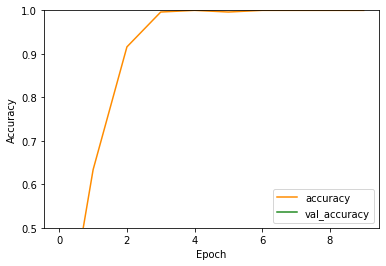

In [45]:
plt.plot(history.history['accuracy'], label = 'accuracy', color = 'darkorange')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'forestgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

In [46]:
from keras.models import load_model
model.save('404Soybeans.h5')